In [1]:
import h5py
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import pickle
import time

In [2]:
# read metadata
path = '/Users/parmisskiani/MEDFAIR/MEDFAIR/Breast2-0/'

demo_data = pd.read_excel(path + 'BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx')
demo_data

,CaseID,Image_filename,Mask_tumor_filename,Mask_other_filename,Pixel_size,Age,Tissue_composition,Signs,Symptoms,Shape,...,Echogenicity,Posterior_features,Halo,Calcifications,Skin_thickening,Interpretation,BIRADS,Verification,Diagnosis,Classification
0,1,case001.png,case001_tumor.png,NaN,0.007812,57,heterogeneous: predominantly fat,breast scar,family history of breast/ovarian cancer,irregular,...,heterogeneous,shadowing,no,no,yes,Breast scar (surgery)&Breast scar (radiotherapy),2,confirmed by follow-up care,not applicable,benign
1,2,case002.png,case002_tumor.png,NaN,0.006462,not available,homogeneous: fat,not available,not available,oval,...,hypoechoic,no,no,no,no,Dysplasia&Fibroadenoma,4b,confirmed by biopsy,Intramammary lymph node,benign
2,3,case003.png,case003_tumor.png,NaN,0.006944,56,heterogeneous: predominantly fat,no,nipple discharge,oval,...,hyperechoic,no,no,no,no,Duct filled with thick fluid&Intraductal papil...,4a,confirmed by biopsy,Usual ductal hyperplasia (UDH)&Pseudoangiomato...,benign
3,4,case004.png,case004_tumor.png,NaN,0.007812,43,homogeneous: fibroglandular,no,no,round,...,hypoechoic,no,no,no,no,Cyst filled with thick fluid,3,confirmed by follow-up care,not applicable,benign
4,5,case005.png,case005_tumor.png,NaN,0.007812,67,homogeneous: fat,nipple retraction&palpable,family history of breast/ovarian cancer,oval,...,complex cystic/solid,enhancement,no,no,no,Suspicion of malignancy&Intraductal papilloma,4b,confirmed by biopsy,Encapsulated papillary carcinoma&Ductal carcin...,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,case252.png,case252_tumor.png,NaN,0.006944,18,homogeneous: fibroglandular,palpable,no,oval,...,hypoechoic,no,no,no,no,Fibroadenoma,4a,confirmed by biopsy,Fibroadenoma,benign
252,253,case253.png,case253_tumor.png,NaN,0.007812,64,homogeneous: fat,palpable&breast scar,family history of breast/ovarian cancer,oval,...,anechoic,enhancement,no,no,yes,Fat necrosis&Breast scar (surgery),2,confirmed by follow-up care,not applicable,benign
253,254,case254.png,case254_tumor.png,NaN,0.007812,57,heterogeneous: predominantly fat,no,no,irregular,...,hypoechoic,shadowing,no,no,no,Suspicion of malignancy,5,confirmed by biopsy,Invasive carcinoma of no special type (NST)&Du...,malignant
254,255,case255.png,case255_tumor.png,NaN,0.006944,42,heterogeneous: predominantly fibroglandular,palpable,family history of breast/ovarian cancer,irregular,...,heterogeneous,shadowing,no,intraductal,no,Suspicion of malignancy&Mastitis,4c,confirmed by biopsy,Ductal carcinoma in situ (DCIS),malignant


In [3]:
# add image path to the metadata
pathlist = demo_data['Image_filename'].values.tolist()
paths = ['/Users/parmisskiani/MEDFAIR/MEDFAIR/Breast2-0/BrEaST-Lesions_USG-images_and_masks/' + i for i in pathlist]
demo_data['Image_filename'] = paths

In [4]:
demo_data['Image_filename'][1]

'/Users/parmisskiani/MEDFAIR/MEDFAIR/Breast2-0/BrEaST-Lesions_USG-images_and_masks/case002.png'

(538, 831, 3)


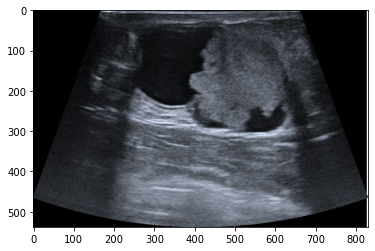

In [5]:
# you can have a look of some examples here
img = cv2.imread(demo_data['Image_filename'][4])
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
from models.CFair.model import CFairNet, CFairNet3D
from models.CFair.CFair import CFair

In [9]:
from models.GSAM.GSAM import GSAM
from models.GSAM.utils import GSAM_optimizer, LinearScheduler

In [10]:
from models.SAMSWAD.SAMSWAD import SAMSWAD